In [1]:
import pandas as pd

df = pd.read_csv('Data_Train.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


# **Exploratory Data Analysis **

# Variable Description:

ID: Unique ID

Asst_Reg: Value of all the assets registered under the borrowers name

GGGrade: Grant Group Grade

Experience: Total year of work experience of the borrower

Validation: Validation status of the borrower

Yearly Income : Total yearly income of the borrower

Home Status: Borrower living status

Unpaid 2 years : No. of times the Borrower has defaulted in last two years

Defaulted : Number of other loans the borrower was default"

Designation : Designation of Borrower

Debt to Income : Debt to Income ratio

Postal Code : Postal code of borrower

Lend Amount : Total funded amount to borrower


Records: An entry that may be considered negative by lenders because it indicates risk and
hurts your ability to qualify for credit or other services"

Interest Charged : Interest charged on total amount

Usage Rate: Processing Charges on the Loan Amount

Inquiries: Inquiries in Last 6 Months

Present Balance: Current balance in the borrower account

Gross Collection: The gross amount payable by way of Settlement or judgment in respect of the Claims, excluding any costs

Sub GGGrade: Sub Grant Group Grade

File Status: Status of the loan file

State: State to which borrower belong

Account Open: Total number of open accounts in the name of Borrower

Total Unpaid CL: Unpaid dues on all the other loans

Duration: Duration for the amount is funded to borrower

Unpaid Amount: Unpaid balance on the credit card

Reason: Reason for loan application

Claim Type: Amongst all Application type what is the borrower Claim Type
I - Individual Account , J - Joint Account"

Due Fee: Charges incurred if the payment on loan amount is delayed

Loan/No Loan: Target Variable

# Understanding dataset:

In [3]:
print("Original dataset shape:", df.shape)

Original dataset shape: (87500, 30)


In [4]:
# Checking data types of each features in our data
df.dtypes

ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly_Income          float64
Home_Status             object
Unpaid_2_years           int64
Already_Defaulted        int64
Designation             object
Debt_to_Income         float64
Postal_Code            float64
Lend_Amount            float64
Deprecatory_Records      int64
Interest_Charged       float64
Usage_Rate             float64
Inquiries                int64
Present_Balance        float64
Gross_Collection       float64
Sub_GGGrade              int64
File_Status             object
State                   object
Account_Open             int64
Total_Unpaid_CL        float64
Duration                object
Unpaid_Amount          float64
Reason                  object
Claim_Type              object
Due_Fee                float64
Default                  int64
dtype: object

 The raw dataset contains 30 features in which 20 features are in numerical datatype and 10
 features are in object datatype.

In [5]:
# Checking for null values
df.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly_Income          5575
Home_Status               0
Unpaid_2_years            0
Already_Defaulted         0
Designation            1414
Debt_to_Income         3489
Postal_Code            1389
Lend_Amount               0
Deprecatory_Records       0
Interest_Charged          0
Usage_Rate                0
Inquiries                 0
Present_Balance           0
Gross_Collection          0
Sub_GGGrade               0
File_Status               0
State                     0
Account_Open              0
Total_Unpaid_CL        4186
Duration                  0
Unpaid_Amount          4852
Reason                    0
Claim_Type                0
Due_Fee                   0
Default                   0
dtype: int64

In [6]:
import numpy as np

## Check Misssing Values
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Yearly_Income 6.37143 % missing values
Designation 1.616 % missing values
Debt_to_Income 3.98743 % missing values
Postal_Code 1.58743 % missing values
Total_Unpaid_CL 4.784 % missing values
Unpaid_Amount 5.54514 % missing values


# HANDLING MISSING VALUE

In [7]:
# Median imputation for numerical variables
df['Yearly_Income'].fillna(df['Yearly_Income'].median(), inplace=True)
df['Debt_to_Income'].fillna(df['Debt_to_Income'].median(), inplace=True)
df['Total_Unpaid_CL'].fillna(df['Total_Unpaid_CL'].median(), inplace=True)
df['Unpaid_Amount'].fillna(df['Unpaid_Amount'].median(), inplace=True)

# Mode imputation for categorical variables
df['Designation'].fillna(df['Designation'].mode()[0], inplace=True)
df['Postal_Code'].fillna(df['Postal_Code'].mode()[0], inplace=True)


In [8]:
print(df.isnull().sum())


ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly_Income          0
Home_Status            0
Unpaid_2_years         0
Already_Defaulted      0
Designation            0
Debt_to_Income         0
Postal_Code            0
Lend_Amount            0
Deprecatory_Records    0
Interest_Charged       0
Usage_Rate             0
Inquiries              0
Present_Balance        0
Gross_Collection       0
Sub_GGGrade            0
File_Status            0
State                  0
Account_Open           0
Total_Unpaid_CL        0
Duration               0
Unpaid_Amount          0
Reason                 0
Claim_Type             0
Due_Fee                0
Default                0
dtype: int64


In [9]:
 print("Total null values in the dataset:",df.isnull().sum().sum())

Total null values in the dataset: 0


In [10]:
# Checking for Duplicates values:
if df.duplicated().any():
 print('There is duplicate values in the data.')
else:
 print('There is no duplicate values in the data.')

There is no duplicate values in the data.


# **Univariate Analysis**

In [11]:
# Univariate Analysis of all numerical columns in dataset
df.describe().round(2)

,ID,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee,Default
count,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00
mean,83946.25,3798914.12,133556.06,0.33,0.01,30.91,51533.90,25920.54,0.20,16.52,95.52,0.67,236389.46,39.46,22.02,12.78,52618.27,29076.08,0.32,0.19
std,36100.10,2289038.08,95755.09,0.88,0.08,13.80,31105.62,14433.84,0.65,4.90,40.55,0.96,255056.78,391.92,6.45,5.37,52046.95,36456.88,3.55,0.39
min,21560.00,24847.00,8800.00,0.00,0.00,0.00,1000.00,1710.00,0.00,8.00,0.00,0.00,0.00,0.00,11.00,2.00,332.00,0.00,0.00,0.00
25%,52616.75,1483874.25,86240.00,0.00,0.00,20.85,23200.00,15048.00,0.00,12.31,66.05,0.00,51734.93,0.00,17.00,9.00,24070.00,11949.48,0.00,0.00
50%,83900.00,4132010.50,114400.00,0.00,0.00,30.14,48100.00,23940.00,0.00,16.49,97.01,0.00,138806.22,0.00,21.00,12.00,39674.00,20892.78,0.00,0.00
75%,115261.25,5952908.75,158400.00,0.00,0.00,40.40,80100.00,34200.00,0.00,20.77,126.59,1.00,353475.54,0.00,26.00,16.00,64408.00,35096.04,0.00,0.00
max,146559.00,7351847.00,8264030.72,18.00,6.00,639.29,99900.00,59850.00,86.00,25.00,1534.76,8.00,5629234.33,26308.47,45.00,83.00,1710630.00,1338777.81,169.05,1.00


In [12]:
import numpy as np



# Getting summary of Non-numerical columns in dataset
df.describe(exclude=[np.number]).T

,count,unique,top,freq
GGGrade,87500,7,II,24966
Experience,87500,11,>10yrs,30849
Validation,87500,3,Source Verified,34504
Home_Status,87500,5,MORTGAGE,44160
Designation,87500,40348,School Teacher,2999
File_Status,87500,2,whole,46300
State,87500,49,California,12625
Duration,87500,2,3 years,60061
Reason,87500,13,debt consolidation,52559
Claim_Type,87500,2,I,87454


# **Analyzing object columns**

## GGGrade VS COUNT

In [13]:
df['GGGrade'].value_counts()

II     24966
III    24652
I      14171
IV     13867
V       7154
VI      2192
VII      498
Name: GGGrade, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


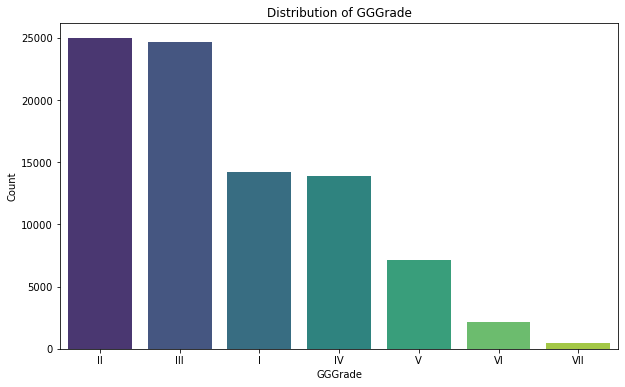

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(x='GGGrade', data=df, palette='viridis', order=df['GGGrade'].value_counts().index)
plt.title('Distribution of GGGrade')
plt.xlabel('GGGrade')
plt.ylabel('Count')
plt.show()


>10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: Experience, dtype: int64


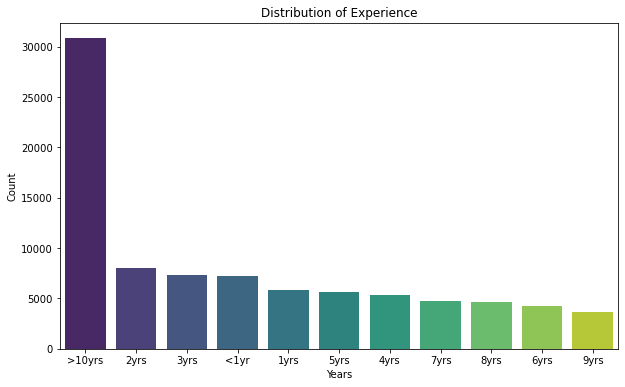

In [15]:
print(df['Experience'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='Experience', data=df, palette='viridis', order=df['Experience'].value_counts().index)
plt.title('Distribution of Experience')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()


Source Verified    34504
Vfied              26642
Not Vfied          26354
Name: Validation, dtype: int64


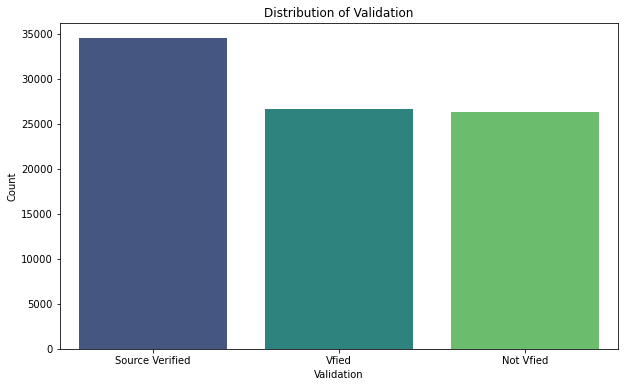

In [16]:
print(df['Validation'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='Validation', data=df, palette='viridis', order=df['Validation'].value_counts().index)
plt.title('Distribution of Validation')
plt.xlabel('Validation')
plt.ylabel('Count')
plt.show()

MORTGAGE    44160
RENT        34914
OWN          8416
OTHER           6
NONE            4
Name: Home_Status, dtype: int64


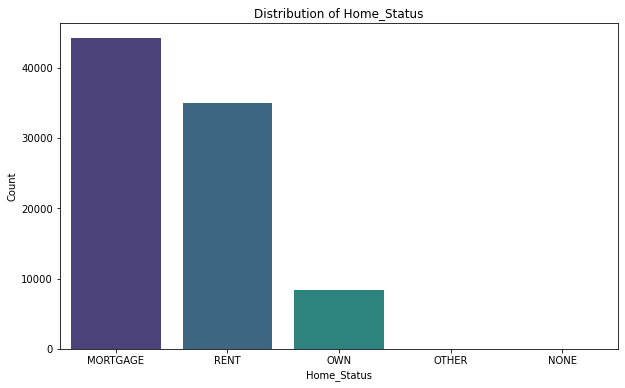

In [17]:
print(df['Home_Status'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='Home_Status', data=df, palette='viridis', order=df['Home_Status'].value_counts().index)
plt.title('Distribution of Home_Status')
plt.xlabel('Home_Status')
plt.ylabel('Count')
plt.show()

In [18]:
print(df['Designation'].value_counts())



School Teacher               2999
Super Lead                   1322
Nurse                         743
RN                            646
Owner                         623
                             ... 
supply chain                    1
B.R. Amon and Sons              1
Medical record technician       1
Executive Field Assistant       1
Outside sales rep               1
Name: Designation, Length: 40348, dtype: int64


Handling invalid records and encoding categorical datatypes will be done later in data
 preprocessing step.

# **Methodology:**

# **Data Pre-Processing:**

Feature engineering:

Invalid data entries:

Missing values:

Outliers:

Encoding categorical variables:

Standardization and normalization:

Dimensionality reduction:

Sampling techniques:

In [19]:
df['Due_Fee'].value_counts()

0.00     86511
15.00      275
30.00       28
20.50        4
44.03        4
         ...  
84.92        1
28.18        1
15.21        1
38.02        1
18.06        1
Name: Due_Fee, Length: 608, dtype: int64

In [20]:
df['Already_Defaulted'].value_counts()

0    87035
1      439
2       22
6        1
5        1
4        1
3        1
Name: Already_Defaulted, dtype: int64

In [21]:
dd=df['State']
dd.head(10)

0    California
1            NC
2       Florida
3     NewJersey
4            LA
5            TX
6    California
7            CT
8    California
9            TX
Name: State, dtype: object

# CHECKING FOR OUTLIER

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [23]:
# Encoding categorical features
df_encoded = pd.get_dummies(df, columns=['GGGrade', 'Experience', 'Validation', 'Home_Status', 'Designation', 'State', 'File_Status', 'Duration', 'Reason', 'Claim_Type'])
# Select numerical features for outlier detection
features = ['Yearly_Income', 'Debt_to_Income', 'Postal_Code', 'Lend_Amount', 'Total_Unpaid_CL', 'Unpaid_Amount', 'Interest_Charged', 'Usage_Rate', 'Present_Balance', 'Gross_Collection']

# Prepare the feature matrix
X = df_encoded[features]

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # contamination is the proportion of outliers

# Fit the model
iso_forest.fit(X)
# Predict outliers
outliers = iso_forest.predict(X)

# Convert predictions to a DataFrame
df['Outlier'] = outliers

# -1 indicates outliers, 1 indicates inliers
outlier_df = df[df['Outlier'] == -1]
print(outlier_df.head())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


         ID  Asst_Reg GGGrade Experience       Validation  Yearly_Income  \
270  131339   6564227      II       <1yr  Source Verified       290400.0   
327   77451   4399865      II       5yrs            Vfied       528000.0   
435   42531   6549919      II       4yrs  Source Verified       387200.0   
491   76536   4557809     III     >10yrs  Source Verified       422400.0   
509  139299   1318697      VI       8yrs  Source Verified       308000.0   

    Home_Status  Unpaid_2_years  Already_Defaulted  \
270         OWN               0                  0   
327    MORTGAGE               0                  0   
435    MORTGAGE               0                  0   
491    MORTGAGE               1                  0   
509        RENT               0                  0   

                                 Designation  ...       State  Account_Open  \
270               Senior Solution Consultant  ...          IL            44   
327                                      coo  ...  Californi

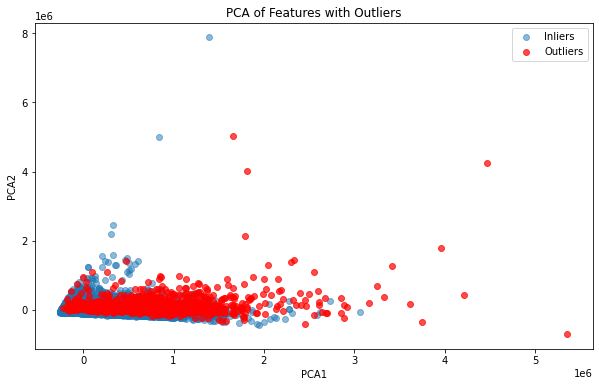

In [24]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA results to DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Outlier'] = df['Outlier']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[df_pca['Outlier'] == 1]['PCA1'], df_pca[df_pca['Outlier'] == 1]['PCA2'], label='Inliers', alpha=0.5)
plt.scatter(df_pca[df_pca['Outlier'] == -1]['PCA1'], df_pca[df_pca['Outlier'] == -1]['PCA2'], label='Outliers', color='red', alpha=0.7)
plt.title('PCA of Features with Outliers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [25]:
df['Outlier'].value_counts()

 1    86625
-1      875
Name: Outlier, dtype: int64

In [26]:
# Review statistical summary of outlier rows
print(outlier_df.describe())

# Compare with inliers
inlier_rows = df[df['Outlier'] == 1]
print(inlier_rows.describe())


                  ID      Asst_Reg  Yearly_Income  Unpaid_2_years  \
count     875.000000  8.750000e+02   8.750000e+02      875.000000   
mean    84167.178286  4.014663e+06   4.232259e+05        0.358857   
std     37530.727373  2.287445e+06   4.023809e+05        0.867226   
min     21814.000000  1.208110e+05   7.392000e+04        0.000000   
25%     50061.000000  1.673570e+06   2.200000e+05        0.000000   
50%     83997.000000  4.221342e+06   3.256000e+05        0.000000   
75%    118433.500000  6.218952e+06   5.130400e+05        0.000000   
max    146520.000000  7.347607e+06   5.491200e+06        9.000000   

       Already_Defaulted  Debt_to_Income   Postal_Code   Lend_Amount  \
count         875.000000      875.000000    875.000000    875.000000   
mean            0.006857       29.191123  47145.714286  45419.261143   
std             0.082571       15.106650  34268.389665  15214.908305   
min             0.000000        0.134400   1000.000000   2052.000000   
25%             0.

In [27]:
df['Gross_Collection'].value_counts()

0.00        85815
2080.72         2
11.90           2
5437.55         2
1200.00         2
            ...  
1054.22         1
803.04          1
2108.94         1
13832.92        1
691.56          1
Name: Gross_Collection, Length: 1678, dtype: int64

# DATA PREPROCESSING

In [28]:
prep_data=df.copy()

In [29]:
# List of columns to remove
columns_to_remove = ['ID','Sub_GGGrade','Designation','Gross_Collection','Outlier']

# Remove the specified columns
new_data=prep_data.drop(columns=columns_to_remove)

# Display the updated DataFrame info
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             87500 non-null  int64  
 1   GGGrade              87500 non-null  object 
 2   Experience           87500 non-null  object 
 3   Validation           87500 non-null  object 
 4   Yearly_Income        87500 non-null  float64
 5   Home_Status          87500 non-null  object 
 6   Unpaid_2_years       87500 non-null  int64  
 7   Already_Defaulted    87500 non-null  int64  
 8   Debt_to_Income       87500 non-null  float64
 9   Postal_Code          87500 non-null  float64
 10  Lend_Amount          87500 non-null  float64
 11  Deprecatory_Records  87500 non-null  int64  
 12  Interest_Charged     87500 non-null  float64
 13  Usage_Rate           87500 non-null  float64
 14  Inquiries            87500 non-null  int64  
 15  Present_Balance      87500 non-null 

In [30]:
# Checking duplicates records after dropping unnecessary columns
if new_data.duplicated().any():
 print('There is duplicate values in the data.')
else:
 print('There is no duplicate values in the data.')

There is no duplicate values in the data.


In [31]:
new_data.shape

(87500, 26)

In [32]:
new_data.describe()

,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee,Default
count,8.750000e+04,8.750000e+04,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.00000,8.750000e+04,8.750000e+04,87500.000000,87500.000000
mean,3.798914e+06,1.335561e+05,0.332937,0.005726,30.910623,51533.901714,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,12.77944,5.261827e+04,2.907608e+04,0.316407,0.188709
std,2.289038e+06,9.575509e+04,0.876080,0.083505,13.797139,31105.615360,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,5.37116,5.204695e+04,3.645688e+04,3.546087,0.391279
min,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,1.483874e+06,8.624000e+04,0.000000,0.000000,20.848800,23200.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,9.00000,2.407000e+04,1.194948e+04,0.000000,0.000000
50%,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,48100.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,5.952909e+06,1.584000e+05,0.000000,0.000000,40.404000,80100.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,16.00000,6.440800e+04,3.509604e+04,0.000000,0.000000
max,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


In [33]:
new_data['Deprecatory_Records'].value_counts()

0     73827
1     11354
2      1481
3       465
4       193
5        85
6        39
7        24
8        14
10        7
9         3
16        2
12        1
86        1
11        1
13        1
22        1
15        1
Name: Deprecatory_Records, dtype: int64

# Handling missing values using simple imputation method

Summary

Categorical Columns: Use Mode Imputation.

Numerical Columns:

Use Mean Imputation for symmetric distributions.

Use Median Imputation for skewed distributions or those with outliers.

Use Interpolation if your data is time-dependent or has a logical order.
New Section
Adjust these methods based on specific characteristics of your dataset and the missing value patterns you observe.

# **Feature** **engineering**

In [34]:
new_data.head()

,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,12.5496,91300.0,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,9.0048,27400.0,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,24.9144,32800.0,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,197179,III,<1yr,Vfied,61600.00,RENT,0,0,16.5816,7000.0,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,40.0512,70800.0,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [35]:
new_data['Inquiries'].value_counts()

0    49853
1    23601
2     9040
3     3537
4     1056
5      315
6       97
8        1
Name: Inquiries, dtype: int64

In [36]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             87500 non-null  int64  
 1   GGGrade              87500 non-null  object 
 2   Experience           87500 non-null  object 
 3   Validation           87500 non-null  object 
 4   Yearly_Income        87500 non-null  float64
 5   Home_Status          87500 non-null  object 
 6   Unpaid_2_years       87500 non-null  int64  
 7   Already_Defaulted    87500 non-null  int64  
 8   Debt_to_Income       87500 non-null  float64
 9   Postal_Code          87500 non-null  float64
 10  Lend_Amount          87500 non-null  float64
 11  Deprecatory_Records  87500 non-null  int64  
 12  Interest_Charged     87500 non-null  float64
 13  Usage_Rate           87500 non-null  float64
 14  Inquiries            87500 non-null  int64  
 15  Present_Balance      87500 non-null 

# **Encoding categorical variables:**

In [37]:


from sklearn.preprocessing import LabelEncoder


X = new_data.drop('Default', axis=1)
y = new_data['Default']

# Identify categorical and numeric columns
categorical_columns = ['GGGrade', 'Experience', 'Validation', 'Home_Status','File_Status','Duration', 'Reason', 'Claim_Type','State']
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_columns)

# Label Encoding for categorical features
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le







# Checking the result
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             87500 non-null  int64  
 1   GGGrade              87500 non-null  int32  
 2   Experience           87500 non-null  int32  
 3   Validation           87500 non-null  int32  
 4   Yearly_Income        87500 non-null  float64
 5   Home_Status          87500 non-null  int32  
 6   Unpaid_2_years       87500 non-null  int64  
 7   Already_Defaulted    87500 non-null  int64  
 8   Debt_to_Income       87500 non-null  float64
 9   Postal_Code          87500 non-null  float64
 10  Lend_Amount          87500 non-null  float64
 11  Deprecatory_Records  87500 non-null  int64  
 12  Interest_Charged     87500 non-null  float64
 13  Usage_Rate           87500 non-null  float64
 14  Inquiries            87500 non-null  int64  
 15  Present_Balance      87500 non-null 

In [38]:
X['State'].value_counts()

6     12625
32     7210
41     7130
9      5813
12     3502
31     3253
36     3169
35     2969
10     2924
43     2545
25     2520
19     2253
24     2073
3      2058
17     2025
4      1882
45     1860
20     1673
13     1433
21     1410
40     1361
5      1325
30     1172
1      1140
46     1116
34     1050
16     1019
38     1005
15      821
14      819
33      766
2       650
42      639
29      497
11      465
28      427
22      410
47      388
37      372
23      259
8       238
7       235
0       221
48      186
39      181
44      178
27      134
26       50
18       49
Name: State, dtype: int64

In [39]:
X.head()

,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,...,Present_Balance,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee
0,421802,1,10,2,633600.00,0,0,0,12.5496,91300.0,...,607161.90,0,6,17,58598.0,0,31216.05,3,0,0.0
1,3964312,3,6,1,85483.20,4,0,0,9.0048,27400.0,...,269234.06,1,25,15,18924.0,1,11660.49,3,0,0.0
2,4247560,2,9,1,79200.00,4,0,0,24.9144,32800.0,...,22476.53,1,9,7,15604.0,1,5637.87,6,0,0.0
3,197179,2,9,2,61600.00,4,0,0,16.5816,7000.0,...,15242.09,0,31,9,22410.0,0,15607.17,6,0,0.0
4,4646684,4,1,1,68053.92,4,0,0,40.0512,70800.0,...,65433.94,0,16,10,36022.0,1,27472.86,3,0,0.0


In [40]:
X['Postal_Code'].value_counts()

75000.0    2366
94500.0     925
11200.0     903
60600.0     842
33100.0     774
           ... 
4300.0        1
90100.0       1
50000.0       1
96500.0       1
83800.0       1
Name: Postal_Code, Length: 865, dtype: int64

## **CORRELATION MATRIX**

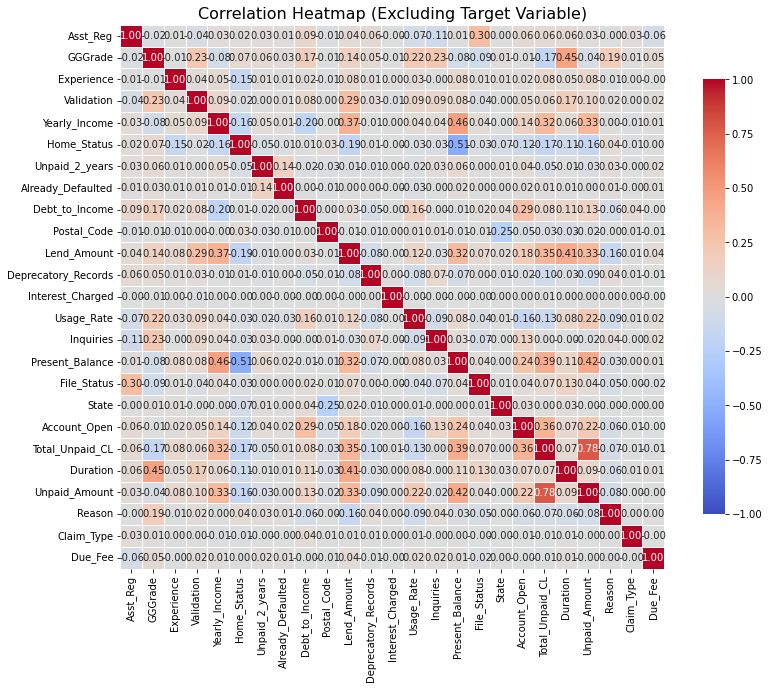

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the correlation matrix
corr_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

# Add a title to the plot
plt.title('Correlation Heatmap (Excluding Target Variable)', fontsize=16)

# Show the plot
plt.show()

In [42]:
X.describe()

,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,...,Present_Balance,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee
count,8.750000e+04,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,...,8.750000e+04,87500.000000,87500.000000,87500.00000,8.750000e+04,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.000000
mean,3.798914e+06,1.810686,6.234629,1.003291,1.335561e+05,1.884800,0.332937,0.005726,30.910623,51533.901714,...,2.363895e+05,0.529143,22.256731,12.77944,5.261827e+04,0.313589,2.907608e+04,3.291211,0.000526,0.316407
std,2.289038e+06,1.303598,3.668031,0.778245,9.575509e+04,1.922969,0.876080,0.083505,13.797139,31105.615360,...,2.550568e+05,0.499153,14.115867,5.37116,5.204695e+04,0.463954,3.645688e+04,1.759687,0.022923,3.546087
min,2.484700e+04,0.000000,0.000000,0.000000,8.800000e+03,0.000000,0.000000,0.000000,0.000000,1000.000000,...,0.000000e+00,0.000000,0.000000,2.00000,3.320000e+02,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.483874e+06,1.000000,3.000000,0.000000,8.624000e+04,0.000000,0.000000,0.000000,20.848800,23200.000000,...,5.173493e+04,0.000000,9.000000,9.00000,2.407000e+04,0.000000,1.194948e+04,3.000000,0.000000,0.000000
50%,4.132010e+06,2.000000,7.000000,1.000000,1.144000e+05,0.000000,0.000000,0.000000,30.139200,48100.000000,...,1.388062e+05,1.000000,21.000000,12.00000,3.967400e+04,0.000000,2.089278e+04,3.000000,0.000000,0.000000
75%,5.952909e+06,3.000000,10.000000,2.000000,1.584000e+05,4.000000,0.000000,0.000000,40.404000,80100.000000,...,3.534755e+05,1.000000,35.000000,16.00000,6.440800e+04,1.000000,3.509604e+04,3.000000,0.000000,0.000000
max,7.351847e+06,6.000000,10.000000,2.000000,8.264031e+06,4.000000,18.000000,6.000000,639.290400,99900.000000,...,5.629234e+06,1.000000,48.000000,83.00000,1.710630e+06,1.000000,1.338778e+06,12.000000,1.000000,169.050000


In [43]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             87500 non-null  int64  
 1   GGGrade              87500 non-null  int32  
 2   Experience           87500 non-null  int32  
 3   Validation           87500 non-null  int32  
 4   Yearly_Income        87500 non-null  float64
 5   Home_Status          87500 non-null  int32  
 6   Unpaid_2_years       87500 non-null  int64  
 7   Already_Defaulted    87500 non-null  int64  
 8   Debt_to_Income       87500 non-null  float64
 9   Postal_Code          87500 non-null  float64
 10  Lend_Amount          87500 non-null  float64
 11  Deprecatory_Records  87500 non-null  int64  
 12  Interest_Charged     87500 non-null  float64
 13  Usage_Rate           87500 non-null  float64
 14  Inquiries            87500 non-null  int64  
 15  Present_Balance      87500 non-null 

# **Standardization and normalization:**

In [44]:
from sklearn.preprocessing import StandardScaler

X_scaled = X.copy()

#nun_columns=['Asst_Reg','Lend_Amount','Debt_to_Income','Unpaid_Amount','Inquiries']

# Robust Scaling for numeric features
scaler = StandardScaler()
X_scaled[numeric_columns] = scaler.fit_transform(X_scaled[numeric_columns])

In [45]:
X_scaled.describe()

,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,...,Present_Balance,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee
count,8.750000e+04,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,8.750000e+04,8.750000e+04,8.750000e+04,8.750000e+04,...,8.750000e+04,87500.000000,87500.000000,8.750000e+04,8.750000e+04,87500.000000,8.750000e+04,87500.000000,87500.000000,8.750000e+04
mean,7.336354e-18,1.810686,6.234629,1.003291,-1.920746e-16,1.884800,-2.101617e-15,2.076561e-15,4.724957e-16,-1.352011e-16,...,4.615863e-17,0.529143,22.256731,-3.562940e-16,-7.419843e-17,0.313589,1.199028e-16,3.291211,0.000526,-1.618228e-15
std,1.000006e+00,1.303598,3.668031,0.778245,1.000006e+00,1.922969,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,0.499153,14.115867,1.000006e+00,1.000006e+00,0.463954,1.000006e+00,1.759687,0.022923,1.000006e+00
min,-1.648766e+00,0.000000,0.000000,0.000000,-1.302874e+00,0.000000,-3.800328e-01,-6.856808e-02,-2.240378e+00,-1.624600e+00,...,-9.268164e-01,0.000000,0.000000,-2.006922e+00,-1.004604e+00,0.000000,-7.975517e-01,0.000000,0.000000,-8.922763e-02
25%,-1.011365e+00,1.000000,3.000000,0.000000,-4.941391e-01,0.000000,-3.800328e-01,-6.856808e-02,-7.292730e-01,-9.108987e-01,...,-7.239784e-01,0.000000,9.000000,-7.036583e-01,-5.485131e-01,0.000000,-4.697796e-01,3.000000,0.000000,-8.922763e-02
50%,1.455189e-01,2.000000,7.000000,1.000000,-2.000538e-01,0.000000,-3.800328e-01,-6.856808e-02,-5.591213e-02,-1.103955e-01,...,-3.825964e-01,1.000000,21.000000,-1.451166e-01,-2.487052e-01,0.000000,-2.244664e-01,3.000000,0.000000,-8.922763e-02
75%,9.410097e-01,3.000000,10.000000,2.000000,2.594544e-01,4.000000,-3.800328e-01,-6.856808e-02,6.880725e-01,9.183635e-01,...,4.590615e-01,1.000000,35.000000,5.996057e-01,2.265223e-01,1.000000,1.651264e-01,3.000000,0.000000,-8.922763e-02
max,1.552160e+00,6.000000,10.000000,2.000000,8.490955e+01,4.000000,2.016616e+01,7.178421e+01,4.409489e+01,1.554908e+00,...,2.114382e+01,1.000000,48.000000,1.307370e+01,3.185626e+01,1.000000,3.592488e+01,12.000000,1.000000,4.758331e+01


In [46]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             87500 non-null  float64
 1   GGGrade              87500 non-null  int32  
 2   Experience           87500 non-null  int32  
 3   Validation           87500 non-null  int32  
 4   Yearly_Income        87500 non-null  float64
 5   Home_Status          87500 non-null  int32  
 6   Unpaid_2_years       87500 non-null  float64
 7   Already_Defaulted    87500 non-null  float64
 8   Debt_to_Income       87500 non-null  float64
 9   Postal_Code          87500 non-null  float64
 10  Lend_Amount          87500 non-null  float64
 11  Deprecatory_Records  87500 non-null  float64
 12  Interest_Charged     87500 non-null  float64
 13  Usage_Rate           87500 non-null  float64
 14  Inquiries            87500 non-null  float64
 15  Present_Balance      87500 non-null 

# **Multicoliniarity** **checking**

In [ ]:
# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data1 = pd.DataFrame()
vif_data1['Feature'] = X.columns
vif_data1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
print(vif_data1)

In [47]:
X_scaled.describe()

,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,...,Present_Balance,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee
count,8.750000e+04,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,8.750000e+04,8.750000e+04,8.750000e+04,8.750000e+04,...,8.750000e+04,87500.000000,87500.000000,8.750000e+04,8.750000e+04,87500.000000,8.750000e+04,87500.000000,87500.000000,8.750000e+04
mean,7.336354e-18,1.810686,6.234629,1.003291,-1.920746e-16,1.884800,-2.101617e-15,2.076561e-15,4.724957e-16,-1.352011e-16,...,4.615863e-17,0.529143,22.256731,-3.562940e-16,-7.419843e-17,0.313589,1.199028e-16,3.291211,0.000526,-1.618228e-15
std,1.000006e+00,1.303598,3.668031,0.778245,1.000006e+00,1.922969,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,0.499153,14.115867,1.000006e+00,1.000006e+00,0.463954,1.000006e+00,1.759687,0.022923,1.000006e+00
min,-1.648766e+00,0.000000,0.000000,0.000000,-1.302874e+00,0.000000,-3.800328e-01,-6.856808e-02,-2.240378e+00,-1.624600e+00,...,-9.268164e-01,0.000000,0.000000,-2.006922e+00,-1.004604e+00,0.000000,-7.975517e-01,0.000000,0.000000,-8.922763e-02
25%,-1.011365e+00,1.000000,3.000000,0.000000,-4.941391e-01,0.000000,-3.800328e-01,-6.856808e-02,-7.292730e-01,-9.108987e-01,...,-7.239784e-01,0.000000,9.000000,-7.036583e-01,-5.485131e-01,0.000000,-4.697796e-01,3.000000,0.000000,-8.922763e-02
50%,1.455189e-01,2.000000,7.000000,1.000000,-2.000538e-01,0.000000,-3.800328e-01,-6.856808e-02,-5.591213e-02,-1.103955e-01,...,-3.825964e-01,1.000000,21.000000,-1.451166e-01,-2.487052e-01,0.000000,-2.244664e-01,3.000000,0.000000,-8.922763e-02
75%,9.410097e-01,3.000000,10.000000,2.000000,2.594544e-01,4.000000,-3.800328e-01,-6.856808e-02,6.880725e-01,9.183635e-01,...,4.590615e-01,1.000000,35.000000,5.996057e-01,2.265223e-01,1.000000,1.651264e-01,3.000000,0.000000,-8.922763e-02
max,1.552160e+00,6.000000,10.000000,2.000000,8.490955e+01,4.000000,2.016616e+01,7.178421e+01,4.409489e+01,1.554908e+00,...,2.114382e+01,1.000000,48.000000,1.307370e+01,3.185626e+01,1.000000,3.592488e+01,12.000000,1.000000,4.758331e+01


# **Feature ectraction method**

# USING XGBOOST

In [1]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize and fit the XGBoost model
model_xgb = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model_xgb.fit(X_scaled, y)

# Get feature importances
importances_xgb = model_xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

# Print the most important features
top_features_xgb = []
for i in range(12):  # Choose how many top features to show
    feature_name = X_scaled.columns[indices_xgb[i]]
    top_features_xgb.append(feature_name)
    print(f'Feature: {feature_name}, Importance: {importances_xgb[indices_xgb[i]]}')

# Select the top features
X_top_features_xgb = X_scaled[top_features_xgb]


Feature: Asst_Reg, Importance: 0.32082900404930115
Feature: Duration, Importance: 0.15486480295658112
Feature: Due_Fee, Importance: 0.057187557220458984
Feature: Usage_Rate, Importance: 0.029283840209245682
Feature: Inquiries, Importance: 0.02540311962366104
Feature: GGGrade, Importance: 0.025094835087656975
Feature: Debt_to_Income, Importance: 0.02487093210220337
Feature: Yearly_Income, Importance: 0.02422410622239113
Feature: Present_Balance, Importance: 0.024135516956448555
Feature: Unpaid_2_years, Importance: 0.023785825818777084
Feature: Deprecatory_Records, Importance: 0.023686647415161133
Feature: Reason, Importance: 0.02336267940700054


In [49]:
X_top_features_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             87500 non-null  float64
 1   Duration             87500 non-null  int32  
 2   Due_Fee              87500 non-null  float64
 3   Usage_Rate           87500 non-null  float64
 4   Inquiries            87500 non-null  float64
 5   GGGrade              87500 non-null  int32  
 6   Debt_to_Income       87500 non-null  float64
 7   Yearly_Income        87500 non-null  float64
 8   Present_Balance      87500 non-null  float64
 9   Unpaid_2_years       87500 non-null  float64
 10  Deprecatory_Records  87500 non-null  float64
 11  Reason               87500 non-null  int32  
dtypes: float64(9), int32(3)
memory usage: 7.0 MB


In [ ]:
#from sklearn.feature_selection import SelectKBest, chi2



# Apply SelectKBest with chi-squared test
#selector = SelectKBest(score_func=chi2, k=10)  # Select top 2 features
#selector.fit(X, y)

# Get the selected feature names
#selected_features = X.columns[selector.get_support(indices=True)]
#print("Selected features:", selected_features)

# **The data is linear or non Linear**

## **Sampling techniques:**

# **Model building**

train test **split**

In [50]:


from sklearn.model_selection import train_test_split
#from imblearn.combine import SMOTETomek
#from imblearn.combine import SMOTEENN
#from imblearn.under_sampling import TomekLinks
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X_top_features_xgb, y, test_size=0.2, random_state=42)







# **Logistic regression**

In [50]:
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression()


logistic.fit(X_train, y_train)

y_pred=logistic.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])  # Probabilities for ROC AUC

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.83
Precision: 0.63
Recall: 0.25
F1 Score: 0.36
ROC AUC Score: 0.82
Confusion Matrix:
[[13737   489]
 [ 2451   823]]


# HANDLING CALSS IMBALANCE

In [2]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



# **SMOTETomek**

In [51]:

from imblearn.combine import SMOTETomek
# Initialize the RandomOverSampler
ros = SMOTETomek(random_state=42)

# Fit and transform the training data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
counter_smote = Counter(y_resampled)
print("Class distribution after SMOTE:", counter_smote)

Class distribution after SMOTE: Counter({0: 56020, 1: 56020})


0    70988
1    16512
Name: Default, dtype: int64


Text(0, 0.5, 'Frequency')

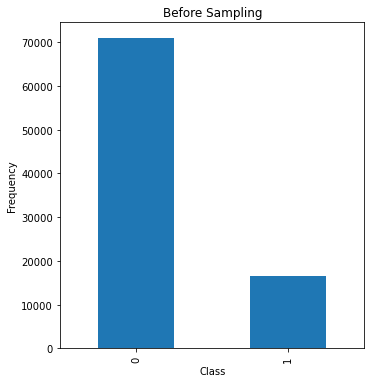

In [52]:
import pandas as pd
import matplotlib.pyplot as plt



print(y.value_counts())
# Visualize the target variable distribution before sampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar')
plt.title('Before Sampling')
plt.xlabel('Class')
plt.ylabel('Frequency')

0    56020
1    56020
Name: Default, dtype: int64


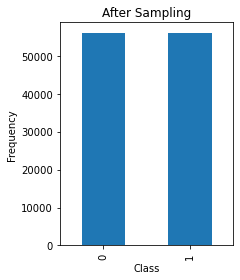

In [53]:


print(y_resampled.value_counts())
# Visualize the target variable distribution after sampling
plt.subplot(1, 2, 2)
y_resampled.value_counts().plot(kind='bar')
plt.title('After Sampling')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **logistic**

In [54]:
from sklearn.linear_model import LogisticRegression

# Train the model on the resampled data
logistic = LogisticRegression()
logistic.fit(X_resampled,y_resampled)

# Evaluate the model
y_pred = logistic.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])  # Probabilities for ROC AUC

report = classification_report(y_test,y_pred)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.93      0.71      0.81     14226
           1       0.38      0.77      0.51      3274

    accuracy                           0.72     17500
   macro avg       0.66      0.74      0.66     17500
weighted avg       0.83      0.72      0.75     17500

Confusion Matrix:
[[10115  4111]
 [  744  2530]]


# **DT**

In [55]:
from sklearn.tree import DecisionTreeClassifier


# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_resampled,y_resampled)

# Predict on the test set
y_pred = dt_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])  # Probabilities for ROC AUC

report = classification_report(y_test,y_pred)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.87      0.75      0.81     14226
           1       0.33      0.53      0.41      3274

    accuracy                           0.71     17500
   macro avg       0.60      0.64      0.61     17500
weighted avg       0.77      0.71      0.73     17500

Confusion Matrix:
[[10726  3500]
 [ 1539  1735]]


# **Naive Bayes**

In [56]:
from sklearn.naive_bayes import GaussianNB


# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_resampled, y_resampled )

# Predict on the test set
y_pred = nb_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])  # Probabilities for ROC AUC

report = classification_report(y_test,y_pred)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.94      0.60      0.73     14226
           1       0.32      0.83      0.46      3274

    accuracy                           0.64     17500
   macro avg       0.63      0.71      0.60     17500
weighted avg       0.82      0.64      0.68     17500

Confusion Matrix:
[[8491 5735]
 [ 567 2707]]


# **RANDOM FOREST**

In [57]:
from sklearn.ensemble import RandomForestClassifier

Randomforest_model = RandomForestClassifier()
Randomforest_model.fit(X_resampled, y_resampled )
y_pred = Randomforest_model.predict(X_test)

In [58]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])  # Probabilities for ROC AUC

report = classification_report(y_test,y_pred)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     14226
           1       0.44      0.59      0.50      3274

    accuracy                           0.78     17500
   macro avg       0.67      0.71      0.68     17500
weighted avg       0.81      0.78      0.79     17500

Confusion Matrix:
[[11731  2495]
 [ 1329  1945]]


# **KNN**

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()  # You can tune the n_neighbors parameter
knn_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = knn_model.predict(X_test)

In [60]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])  # Probabilities for ROC AUC

report = classification_report(y_test,y_pred)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.90      0.71      0.79     14226
           1       0.34      0.64      0.44      3274

    accuracy                           0.70     17500
   macro avg       0.62      0.68      0.62     17500
weighted avg       0.79      0.70      0.73     17500

Confusion Matrix:
[[10129  4097]
 [ 1180  2094]]


# **GradientBoosting**

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_resampled, y_resampled)
# Make predictions
y_pred = gb_model.predict(X_test)


In [62]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])  # Probabilities for ROC AUC

report = classification_report(y_test,y_pred)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82     14226
           1       0.40      0.74      0.52      3274

    accuracy                           0.74     17500
   macro avg       0.66      0.74      0.67     17500
weighted avg       0.83      0.74      0.77     17500

Confusion Matrix:
[[10558  3668]
 [  863  2411]]


# **AdaBoostClassifier**

In [63]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoostClassifier
ada_model = AdaBoostClassifier()

# Fit the model on the training data
ada_model.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = ada_model.predict(X_test)

In [64]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])  # Probabilities for ROC AUC

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

report = classification_report(y_test,y_pred)
print(report)

Confusion Matrix:
[[10102  4124]
 [  781  2493]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.80     14226
           1       0.38      0.76      0.50      3274

    accuracy                           0.72     17500
   macro avg       0.65      0.74      0.65     17500
weighted avg       0.83      0.72      0.75     17500



# **XGBclassifier**

In [65]:
from xgboost import XGBClassifier


# Initialize XGBClassifier
xgb_model = XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

In [66]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,  xgb_model.predict_proba(X_test)[:, 1])  # Probabilities for ROC AUC

report = classification_report(y_test,y_pred)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85     14226
           1       0.42      0.61      0.50      3274

    accuracy                           0.77     17500
   macro avg       0.66      0.71      0.67     17500
weighted avg       0.81      0.77      0.78     17500

Confusion Matrix:
[[11441  2785]
 [ 1278  1996]]


# COMBINED MODEL- VOTING

In [68]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize the base models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Initialize the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')  # 'soft' voting uses predicted probabilities



# Fit the Voting Classifier
voting_clf.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = voting_clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[11639  2587]
 [ 1292  1982]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86     14226
           1       0.43      0.61      0.51      3274

    accuracy                           0.78     17500
   macro avg       0.67      0.71      0.68     17500
weighted avg       0.81      0.78      0.79     17500



# **ANN-CLASSIFIER**

In [70]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you hav

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [56]:


# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Train the model
history = model.fit(X_resampled, y_resampled, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # For binary classification

# Print performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/100


C:\Users\dv23319\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2801/2801 ━━━━━━━━━━━━━━━━━━━━ 3s 918us/step - accuracy: 0.6964 - loss: 0.5770 - val_accuracy: 0.6832 - val_loss: 0.6812
Epoch 2/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.7458 - loss: 0.5103 - val_accuracy: 0.6728 - val_loss: 0.6775
Epoch 3/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.7515 - loss: 0.5024 - val_accuracy: 0.6446 - val_loss: 0.6969
Epoch 4/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.7529 - loss: 0.5011 - val_accuracy: 0.6651 - val_loss: 0.6623
Epoch 5/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 3s 886us/step - accuracy: 0.7541 - loss: 0.4990 - val_accuracy: 0.6466 - val_loss: 0.6827
Epoch 6/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.7515 - loss: 0.4986 - val_accuracy: 0.6683 - val_loss: 0.6671
Epoch 7/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.7536 - loss: 0.4983 - val_accuracy: 0.6372 - val_loss: 0.7320
Epoch 8/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 3s 886us/step - accuracy: 0.7547 - los

# Hperparameter tunning for random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np

# Define the model
Randomforest_model = RandomForestClassifier()

# Define the parameter distributions to sample from
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}



In [ ]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=Randomforest_model,
    param_distributions=param_distributions,
    n_iter=100,  # Number of different combinations to try
    cv=3,        # Number of folds in cross-validation
    verbose=2,   # Verbosity level
    random_state=42,  # For reproducibility
    n_jobs=-1    # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])  # Probabilities for ROC AUC

# Print performance metrics
report = classification_report(y_test, y_pred)
print("\nClassification Report on Test Set:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
